# Chapter 09: Orthogonal Matrices & QR Decomposition

## Concepts

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# Orthogonal Matrices

# Create two orthoginal matrices
orthogonal_matrix_1 = np.array([ [1,-1],[1,1] ]) / np.sqrt(2)
orthogonal_matrix_2 = np.array([ [1,2,2],[2,1,-2],[-2,2,-1] ]) / 3

# Multiply matrices by their transpose
matrix_q1_tranpose_product = orthogonal_matrix_1.T @ orthogonal_matrix_1
matrix_q2_tranpose_product = orthogonal_matrix_2.T @ orthogonal_matrix_2

# Check if matrix product equals identity matrix
check_1 = np.allclose(matrix_q1_tranpose_product, np.eye(2))
check_2 = np.allclose(matrix_q2_tranpose_product, np.eye(3))

print("Orthogonal Matrix 1 multipled by its transpose equals the Identity Matrix:", check_1)
print("Orthogonal Matrix 2 multipled by its transpose equals the Identity Matrix:", check_2)


Orthogonal Matrix 1 multipled by its transpose equals the Identity Matrix: True
Orthogonal Matrix 2 multipled by its transpose equals the Identity Matrix: True


In [57]:
# QR Decomposition

def perform_and_plot_qr(matrix_a, mode=None):
    """Performs QR decomposition of a matrix and visualizes the results along with their properties."""
    
    # Perform QR decomposition based on the mode
    if mode == 'complete' or mode == 'reduced':
        matrix_q, matrix_r = np.linalg.qr(matrix_a, mode)
    else:
        matrix_q, matrix_r = np.linalg.qr(matrix_a)

    # Calculate difference between matrix a and matrix q,r product
    matrix_difference = matrix_a - (matrix_q @ matrix_r)

    # Calculate orthogonal matrix transpose product
    matrix_product = matrix_q.T @ matrix_q

    # Create Plot
    fig, axis = plt.subplots(1, 5, figsize=(10, 4))
    titles = ['A', 'Q', 'R', 'A - QR', 'Q^TQ']
    matrices = [matrix_a, matrix_q, matrix_r, matrix_difference, matrix_product]

    for i, (title, matrix) in enumerate(zip(titles, matrices)):
        ax = axis[i]
        ax.imshow(matrix, cmap='gray', vmin=0, vmax=1)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

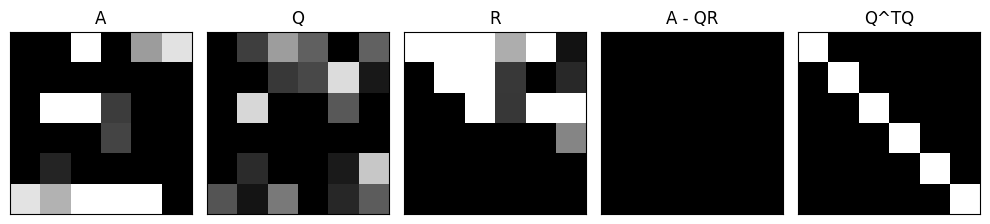

In [58]:
# QR Decomposition

# For a square matrix (reduced by default)
matrix_a = np.random.randn(6, 6)
perform_and_plot_qr(matrix_a)

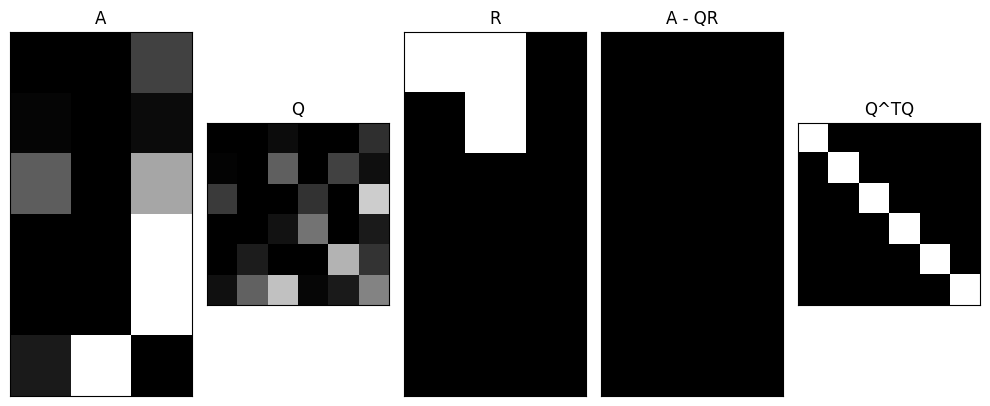

In [59]:
# QR Decomposition (Tall Matrices, Full)

# For a tall matrix with 'complete' mode
matrix_b = np.random.randn(6, 3)
perform_and_plot_qr(matrix_b, 'complete')

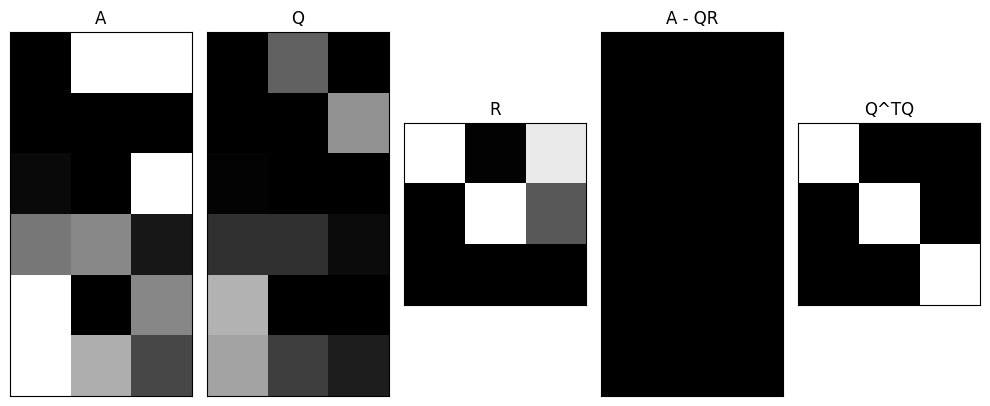

In [60]:
# QR Decomposition (Tall Matrices, Economy)

# For a tall matrix with 'economy' mode
matrix_c = np.random.randn(6, 3)
perform_and_plot_qr(matrix_c, 'reduced')

## Code Exercises

In [61]:
# Exercise 9-1 (Orthogonal matrix multiplied by its Transpose equals the Identity matrix)

# Generate a random matrix and perform QR decomposition
random_matrix_a = np.random.randn(5, 5)
matrix_q, matrix_r = np.linalg.qr(random_matrix_a)

# Matrix products
matrix_product_1 = matrix_q @ matrix_q.T
matrix_product_2 = matrix_q.T @ matrix_q
matrix_product_3 = np.linalg.inv(matrix_q) @ matrix_q
matrix_product_4 = matrix_q @ np.linalg.inv(matrix_q)

# Check if all matrix products are close to the identity matrix
def check_identity(matrix, size=5):
    """Check if the given matrix is close to the identity matrix of a specified size."""
    identity_matrix = np.eye(size)
    return np.allclose(matrix, identity_matrix)

# Test all matrices
results = {
    'QQ^T is Identity': check_identity(matrix_product_1),
    'Q^TQ is Identity': check_identity(matrix_product_2),
    'inv(Q)Q is Identity': check_identity(matrix_product_3),
    'Qinv(Q) is Identity': check_identity(matrix_product_4)
}

# Print results
for test, result in results.items():
    print(f"{test}: {result}")

QQ^T is Identity: True
Q^TQ is Identity: True
inv(Q)Q is Identity: True
Qinv(Q) is Identity: True


In [75]:
# Exercise 9-2 (Gram-Schmidt procedure)

def gram_schmidt(matrix_a):
    """Perform the Gram-Schmidt process to orthogonalize a set of vectors (columns of matrix_a)."""
    num_rows, num_columns = matrix_a.shape
    matrix_q = np.zeros((num_rows, num_columns))
    
    for i in range(num_columns):
        # Start with the current column of matrix_a
        q = matrix_a[:, i]
        
        # Subtract projections of q onto the previously obtained orthogonal vectors
        for j in range(i):
            q -= np.dot(matrix_q[:, j], matrix_a[:, i]) * matrix_q[:, j] / np.dot(matrix_q[:, j], matrix_q[:, j])
        
        # Normalize the vector
        matrix_q[:, i] = q / np.linalg.norm(q)
        
    return matrix_q

# Create random numbers matrix
random_matrix_a = np.random.randn(4, 4)

# Execute our implementation of Gram-Schmidt procedure
orthogonal_matrix = gram_schmidt(random_matrix_a)

# Calculate orthogonal matrix of matrix_a using numpy qr decomposition
matrix_q, matrix_r = np.linalg.qr(random_matrix_a)

# Verify that the columns are orthogonal by checking if Q^T Q is close to the identity matrix
identity_matrix = np.eye(4)
is_orthogonal = np.allclose(np.dot(orthogonal_matrix.T, orthogonal_matrix), identity_matrix)

# Verify our implementation yields same result as numpy
similarity_check = np.allclose(np.abs(orthogonal_matrix), np.abs(matrix_q))

print("Is Q^T Q close to the identity matrix?:", is_orthogonal)
print("Is our resulting orthogonal matrix effectively the same as numpy's?:", similarity_check)


Is Q^T Q close to the identity matrix?: True
Is our resulting orthogonal matrix effectively the same as numpy's?: True


In [88]:
# Exercise 9-3 (QR decomposition on almost orthogonal matrix)

random_matrix_a = np.random.randn(6, 6)

# Step 1: Obtain an orthogonal matrix U from the QR decomposition of the random matrix
U, _ = np.linalg.qr(random_matrix_a)

# Step 2: Modify the norms of the columns of U
for i in range(U.shape[1]):  # Ensure we iterate over columns
    U[:, i] = U[:, i] * (10 + i)

# Step 3: Perform QR decomposition on the modified matrix U
q, r = np.linalg.qr(U)

# Print the upper triangular matrix R after first modification
print("R matrix after modifying column norms:")
print(np.round(r, 3))
print('\n')

# Step 4: Change a specific element in the matrix U to see the effect on QR decomposition
U[0, 3] = 0

# Step 5: Perform QR decomposition again after changing one element
q, r = np.linalg.qr(U)

# Print the upper triangular matrix R after changing an element
print("R matrix after changing an element (U[0,3] = 0):")
print(np.round(r, 3))


R matrix after modifying column norms:
[[10. -0. -0.  0.  0.  0.]
 [ 0. 11. -0.  0.  0.  0.]
 [ 0.  0. 12.  0. -0.  0.]
 [ 0.  0.  0. 13.  0. -0.]
 [ 0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0.  0. 15.]]


R matrix after changing an element (U[0,3] = 0):
[[10.    -0.    -0.     0.762  0.     0.   ]
 [ 0.    11.    -0.     2.571  0.     0.   ]
 [ 0.     0.    12.     1.473 -0.     0.   ]
 [ 0.     0.     0.    12.185 -0.663 -1.045]
 [ 0.     0.     0.     0.    13.984 -0.05 ]
 [ 0.     0.     0.     0.     0.    14.963]]


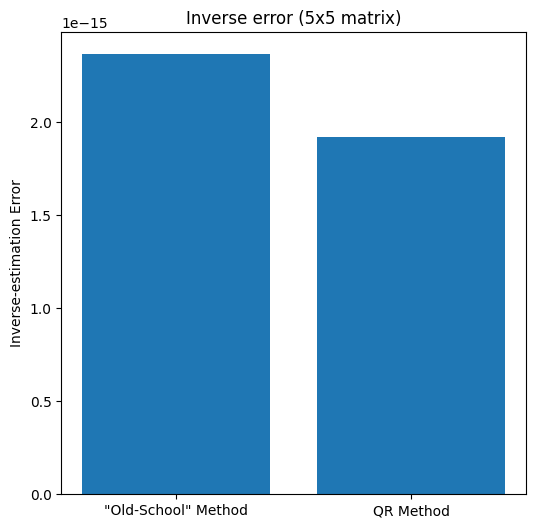

In [113]:
# Exercise 9-4 (Compare Matrix inverse implementations)

def oldSchoolInv(matrix):
    """Compute the inverse of a matrix."""

    # matrix size
    n = matrix.shape[0]

    # abort if non-square
    if not np.diff(matrix.shape)[0]==0:
        raise Exception('Matrix must be square.')

    if np.linalg.matrix_rank(matrix) != n:
        raise Exception('Matrix must be full-rank.')
    
    # Compute minors matrix
    minors_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rows = np.arange(n) != i
            cols = np.arange(n) != j
            minors_matrix[i, j] = np.linalg.det(matrix[rows][:, cols])

    # Compute grid matrix
    grid_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            grid_matrix[i, j] = (-1) ** (i + j)

    # Compute Cofactors matrix
    cofactors_matrix = minors_matrix * grid_matrix

    # Compute Adjugate Matrix (Inverse) & Numpy Inverse
    adjugate_matrix = cofactors_matrix.T / np.linalg.det(matrix)

    return adjugate_matrix


# Create random numbers matrix
n = 5
random_matrix = np.random.randn(n,n)

# Via "Old-School" method
old_school_inverse = oldSchoolInv(random_matrix)
old_school_method_matrix_product = old_school_inverse @ random_matrix

# Via QR decomposition
matrix_q, matrix_r = np.linalg.qr(random_matrix)
matrix_inverse = oldSchoolInv(matrix_r) @ matrix_q.T
qr_method_matrix_product = matrix_inverse @ random_matrix

# Calculate inverse-estimation error for both metods
def euclidean_distance(matrix_a, matrix_b):
    return np.sqrt(np.sum((matrix_a - matrix_b) ** 2))

identity_matrix = np.eye(n)
old_school_method_distance = euclidean_distance(old_school_method_matrix_product, identity_matrix)
qr_method_distance = euclidean_distance(qr_method_matrix_product, identity_matrix)
distances = [old_school_method_distance, qr_method_distance]

# Create plot
plt.figure(figsize=(6,6))

plt.bar(range(2),distances)
plt.xticks(range(2),labels=['"Old-School" Method','QR Method'])
plt.ylabel('Inverse-estimation Error')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

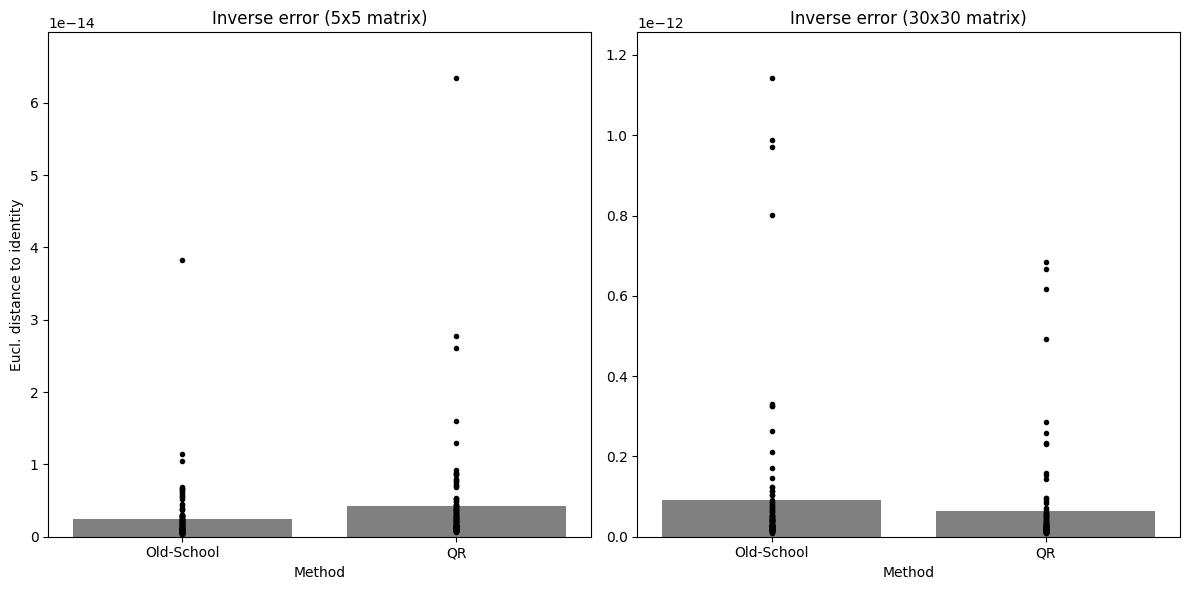

In [155]:
def perform_experiments(matrix_size, num_experiments):
    distances = np.zeros((num_experiments, 2))
    for experiment in range(num_experiments):
        # Create random matrix
        random_matrix = np.random.randn(matrix_size, matrix_size)

        # Inverse calculations
        old_school_inverse = oldSchoolInv(random_matrix)
        old_school_method_matrix_product = old_school_inverse @ random_matrix

        # QR method for inverse calculation
        matrix_q, matrix_r = np.linalg.qr(random_matrix)
        matrix_inverse = oldSchoolInv(matrix_r) @ matrix_q.T
        qr_method_matrix_product = matrix_inverse @ random_matrix

        # Calculate differences
        identity_matrix = np.eye(matrix_size)
        distances[experiment, 0] = euclidean_distance(old_school_method_matrix_product, identity_matrix)
        distances[experiment, 1] = euclidean_distance(qr_method_matrix_product, identity_matrix)

    return distances

# Experiment settings
num_experiments = 100
matrix_sizes = [5, 30]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, size in enumerate(matrix_sizes):
    distances = perform_experiments(size, num_experiments)
    
    axes[i].plot(np.zeros(num_experiments), distances[:,0], 'ko', markersize=3, label='Old-School Method')
    axes[i].plot(np.ones(num_experiments), distances[:,1], 'ko', markersize=3, label='QR Method')
    axes[i].bar([0, 1], np.mean(distances, axis=0), color='grey')

    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Old-School', 'QR'])
    axes[i].set_ylim([0, np.max(distances) * 1.1])
    axes[i].set_title(f'Inverse error ({size}x{size} matrix)')
    axes[i].set_xlabel('Method')
    if i == 0:
        axes[i].set_ylabel('Eucl. distance to identity')

plt.tight_layout()
plt.show()

In [163]:
# Exercise 9-6 (Orthogonal matrices can rotate but not scale vectors)

# Create orthogonal matrix from random numbers matrix
n = 7
random_matrix = np.random.randn(n, n)
matrix_q, matrix_r = np.linalg.qr(random_matrix)

# Print out the norms
induced_two_norm = np.linalg.norm(matrix_q, 2)
frobenius_norm = np.sqrt(np.sum(matrix_q ** 2)) / np.sqrt(n)
print("Induced 2-norm:", induced_two_norm)
print("Frobenius Norm:", frobenius_norm)

# Create a random vector
random_vector = np.random.randn(n, 1)

# Calculate norms
norm_vector = np.linalg.norm(random_vector)
norm_matrix_vector_product = np.linalg.norm(matrix_q @ random_vector)
print("Vector Norm:", norm_vector)
print("Matrix-Vector Product Norm:", norm_matrix_vector_product)
     

Induced 2-norm: 1.0
Frobenius Norm: 1.0
Vector Norm: 3.014852932629491
Matrix-Vector Product Norm: 3.014852932629491


In [179]:
# Exercise 9-7 (Invertibility and inverse calculations of the R matrix)

# Create tall random numbers matrix
matrix_a = np.random.randn(10, 4)

# Get R from QR decomposition
matrix_q, matrix_r = np.linalg.qr(matrix_a, 'complete')
print("Matrix R:", "\n", np.round(matrix_r, 3), "\n")
    
# Get invertible submatrix of matrix R
submatrix_r = matrix_r[:4,:]

# Calculate matrix inverses
submatrix_r_inverse = np.linalg.inv(submatrix_r)
matrix_r_left_inverse = np.linalg.pinv(matrix_r)
print("Full inverse of R submatrix:", "\n", np.round(submatrix_r_inverse, 3), "\n")
print("Left inverse of R:", "\n", np.round(matrix_r_left_inverse, 3), "\n")

Matrix R: 
 [[-2.986 -0.031 -1.07   1.613]
 [ 0.    -2.987 -0.66   0.984]
 [ 0.     0.    -1.966 -1.801]
 [ 0.     0.     0.     2.013]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.   ]] 

Full inverse of R submatrix: 
 [[-0.335  0.003  0.181  0.429]
 [-0.    -0.335  0.112  0.264]
 [-0.    -0.    -0.509 -0.455]
 [ 0.     0.     0.     0.497]] 

Left inverse of R: 
 [[-0.335  0.003  0.181  0.429  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.335  0.112  0.264  0.     0.     0.     0.     0.     0.   ]
 [-0.    -0.    -0.509 -0.455  0.     0.     0.     0.     0.     0.   ]
 [-0.     0.     0.     0.497  0.     0.     0.     0.     0.     0.   ]] 

